In [11]:
# Here we combine all relevant columns from all relevant catalogues into one!
import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff,join,hstack
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Read in tables to use
GAMA_galaxies = Table.read('/suphys/fscu5535/python_scripts/mod_data/GAMA_galaxies_in_SAMI.fits',format='fits',memmap=True)
StellarMassesPanChrom = Table.read('~/python_scripts/mod_data/StellarMassesPanChrom_in_SAMI.fits',format='fits',memmap=True)
SAMIDR3Stelkin = Table.read('~/python_scripts/mod_data/samiDR3Stelkin_in_GAMA.fits',format='fits',memmap=True)
ISIterCen = Table.read('~/python_scripts/mod_data/ISIterCenCATAID.fits',format='fits',memmap=True)
ISBCG = Table.read('/suphys/fscu5535/python_scripts/mod_data/ISBCG_in_SAMI',format='fits',memmap=True)

#

# Combine into one table
combined_table = hstack([GAMA_galaxies['CATAID','GroupID','RankIterCen','RankBCG'],StellarMassesPanChrom['logmstar'],SAMIDR3Stelkin['LAMBDAR_RE'],ISIterCen,ISBCG])
combined_table.info()
print(combined_table)




<Table length=2147>
    name     dtype     unit      class     n_bad
----------- ------- --------- ------------ -----
     CATAID   int32           MaskedColumn     0
    GroupID   int32           MaskedColumn     0
RankIterCen   int16           MaskedColumn     0
    RankBCG   int16           MaskedColumn     0
   logmstar float32 dex(Msun)       Column     0
 LAMBDAR_RE float32                 Column   983
  ISIterCen    bool                 Column     0
      ISBCG    bool                 Column     0
 CATAID GroupID RankIterCen RankBCG  logmstar LAMBDAR_RE ISIterCen ISBCG
                                    dex(Msun)                           
------- ------- ----------- ------- --------- ---------- --------- -----
   6821       0        -999    -999 7.3118334        nan     False False
   6837  203007           1       1   9.82991        nan      True  True
   7139  203032           1       1 10.858629        nan      True  True
   7206  203039           1       1 10.410899 0.5493

In [14]:
combined_sorted_relevant2 = combined_table

# Checking to make sure IS columns align
matching_BCG = 0
ISBCG_count = 0
ISIterCen_count = 0
matching_IterCen = 0
for i in range(len(combined_sorted_relevant2)):
    if combined_sorted_relevant2['ISIterCen'][i] == True:
        ISIterCen_count += 1
        if combined_sorted_relevant2['RankIterCen'][i] == 1:
            matching_IterCen += 1
    if combined_sorted_relevant2['ISBCG'][i] == True:
        ISBCG_count +=1
        if combined_sorted_relevant2['RankBCG'][i] == 1:
            matching_BCG += 1
print("matching bcgs:",matching_BCG)
print("ISBCG count:", ISBCG_count)
print("matching itercens:",matching_IterCen)
print("ISIterCen count:",ISIterCen_count)

matching bcgs: 614
ISBCG count: 614
matching itercens: 606
ISIterCen count: 606


In [17]:
# So they do. Hence, data was sorted to begin with! Since IS columns h


0


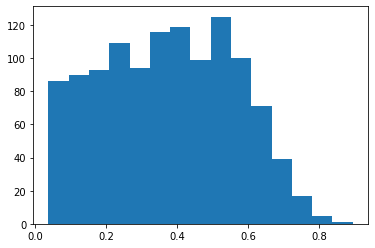

In [16]:
lambdar_hist = plt.hist(combined_sorted_relevant2['LAMBDAR_RE'],bins='auto')